In [1]:
# run this to shorten the data import from the files
path_data = '/home/nero/Documents/Estudos/DataCamp/Python/courses/Performing_Experiments_in_Python/datasets/'
import pandas as pd
import numpy as np
import plotnine as p9
from scipy import stats
import statsmodels as sm

In [2]:
countrydata = pd.read_csv(path_data+'countrydata.csv')

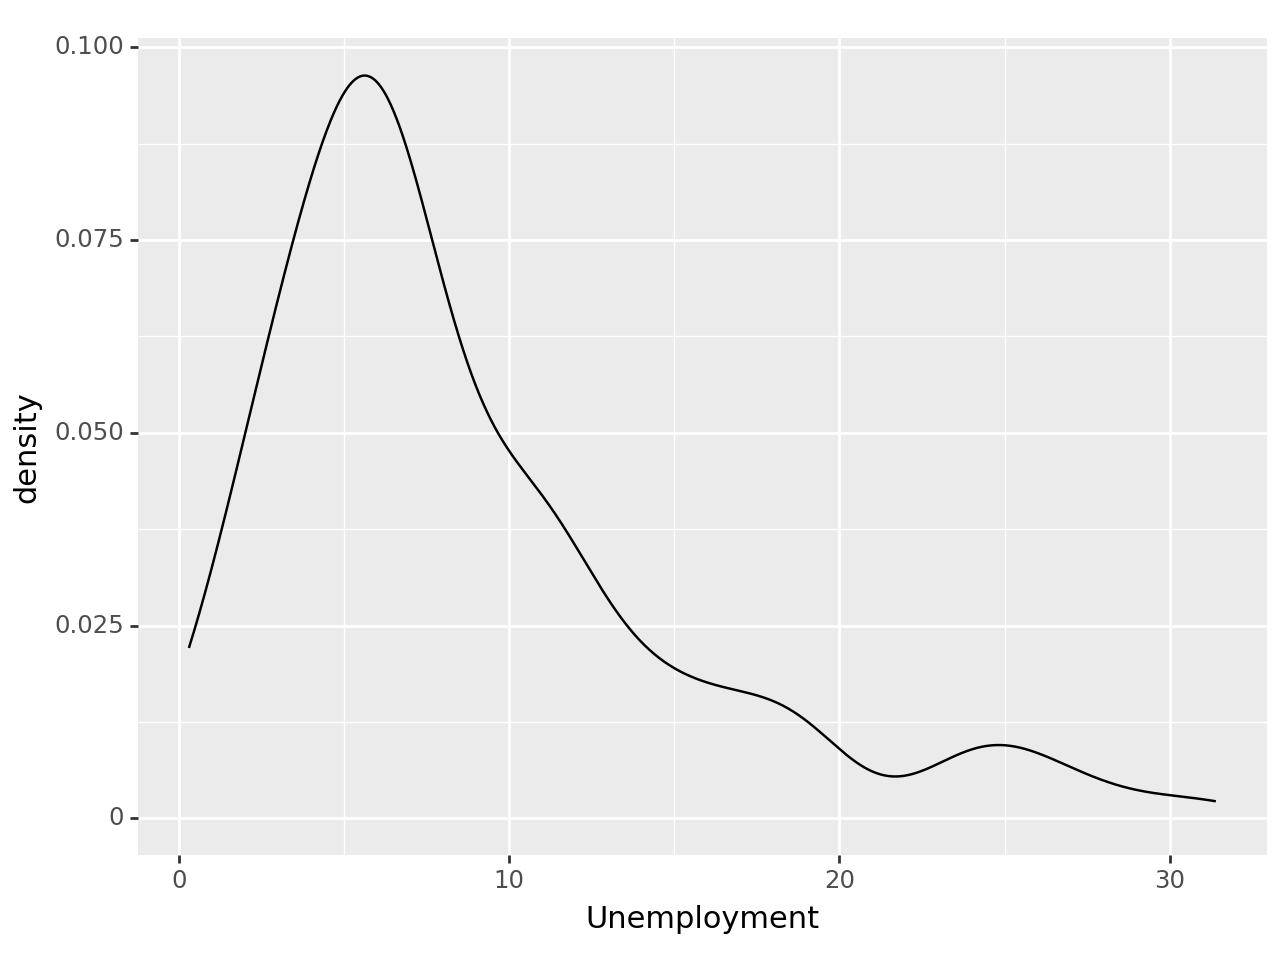


8.72910052910053
6.7
0    6.6
Name: Unemployment, dtype: float64


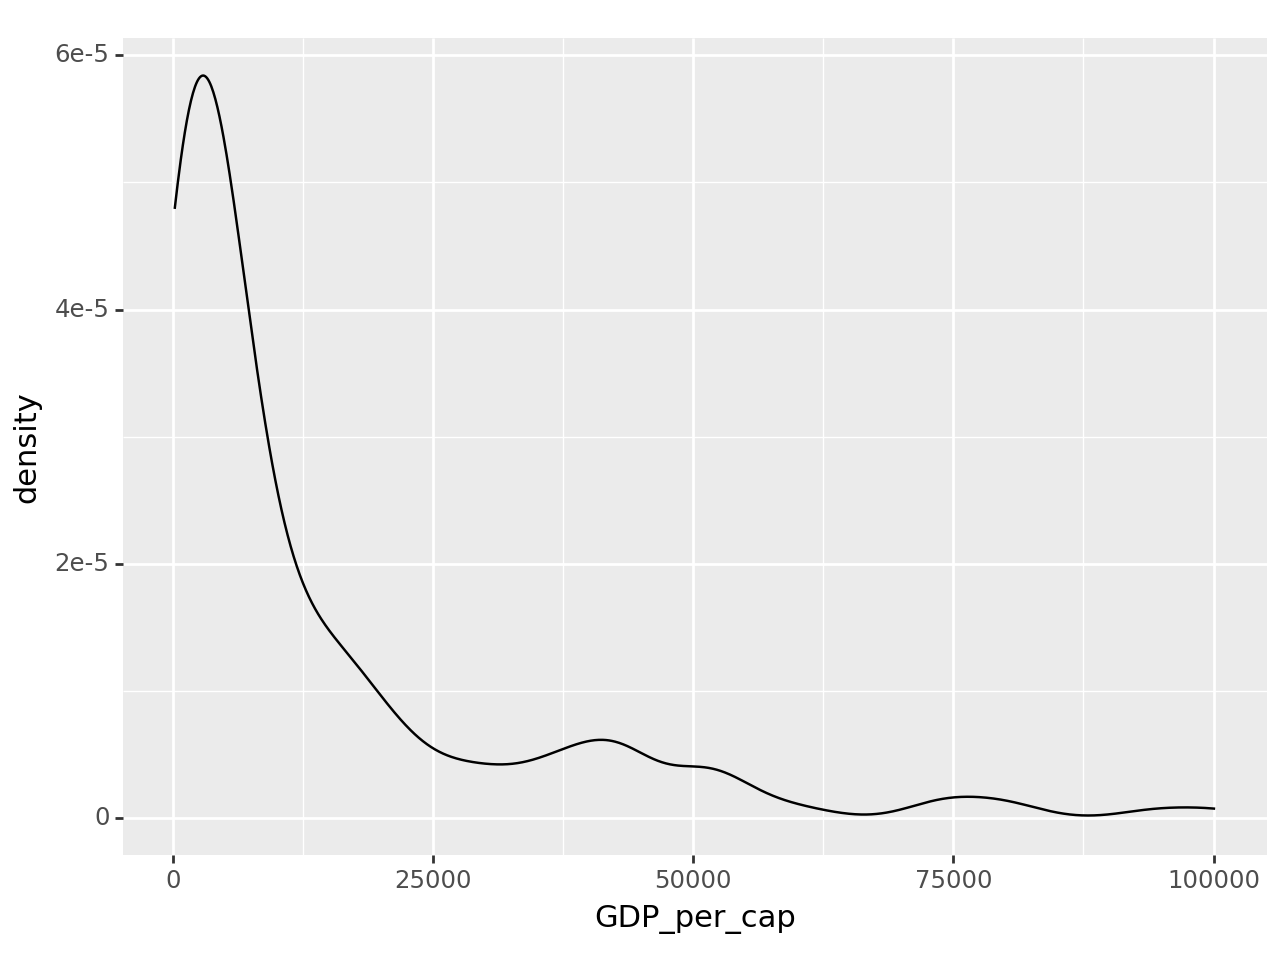


13851.272486772486
5238.6
0    1106.4
Name: GDP_per_cap, dtype: float64


'\nNice work. Neither of these variables are normally distributed. Note that the mean, median, and mode are different each time and that a couple of modes are present. GDP per capita departs farther from normality than Unemployment.\n'

In [3]:
# exercise 01

"""
Exploring distributions with summary stats

Let's return to our UN demographic data, countrydata, to examine distributions using summary statistics. For each Country, you have information about the GDP per capita in USD (GDP_per_cap) and the unemployment rate (Unemployment). How close to normality is each?

For a perfect normal distribution, the mean, median, and mode will be identical, and the density plot will show a classic, symmetrical bell curve. pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9.
"""

# Instructions

"""
Create and print a density plot of Unemployment and print its mean(), median(), and mode().
---
Create and print a density plot of GDP per capita and print its mean(), median(), and mode().
"""

# solution

# Print density plot, mean, median, and mode of Unemployment
print(p9.ggplot(countrydata)+ p9.aes(x='Unemployment')+ p9.geom_density())
print(countrydata.Unemployment.mean())
print(countrydata.Unemployment.median())
print(countrydata.Unemployment.mode())

#----------------------------------#

# Print density plot, mean, median, and mode of GDP per capita
print(p9.ggplot(countrydata)+ p9.aes(x='GDP_per_cap')+ p9.geom_density())
print(countrydata.GDP_per_cap.mean())
print(countrydata.GDP_per_cap.median())
print(countrydata.GDP_per_cap.mode())

#----------------------------------#

# Conclusion

"""
Nice work. Neither of these variables are normally distributed. Note that the mean, median, and mode are different each time and that a couple of modes are present. GDP per capita departs farther from normality than Unemployment.
"""

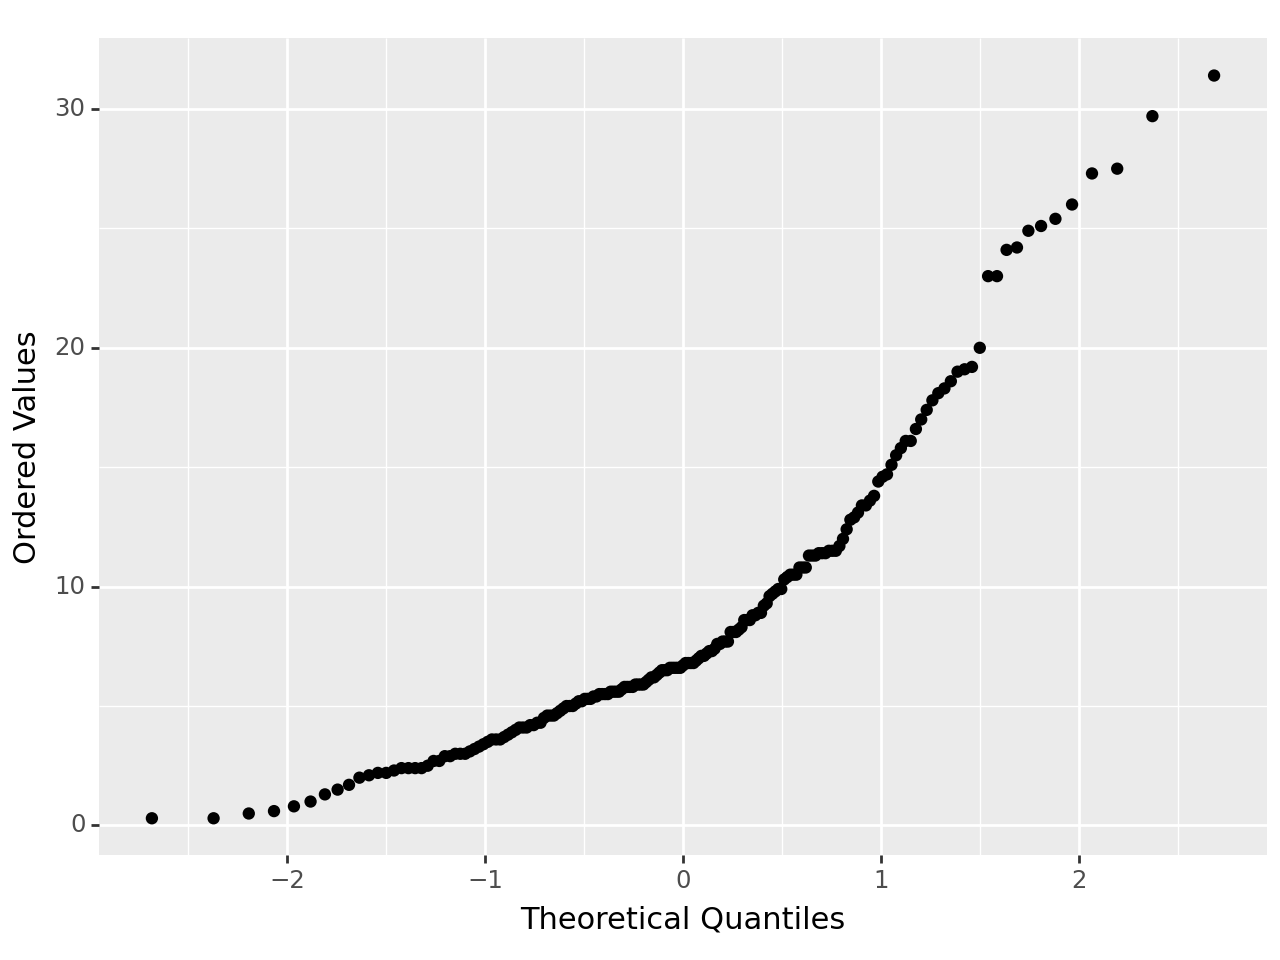

"\nGreat work! Look at the curve on the graph. This variable isn't normally distributed.\n"

In [4]:
# exercise 02

"""
Q-Q plot

Another way to examine the normality of a distribution is with a Q-Q (quantile-quantile) plot. For this exercise, you will create a Q-Q plot for the country-level Unemployment data you saw in the last exercise (available in your workspace as countrydata). The Q-Q plot compares the theoretical quantiles expected under a normal distribution to the actual observed values (ordered). When a distribution is normally distributed, you will see a straight line. The more crooked the line is, the farther the distribution departs from normality. pandas and scipy.stats have been loaded into the workspace as pd and stats.
"""

# Instructions

"""

    Calculate the theoretical quantiles for a normal distribution.
    Create a DataFrame including your theoretical quantiles and the ordered values for Unemployment.
    Create and print a Q-Q plot using your DataFrame.

"""

# solution

# Calculate theoretical quantiles
tq = stats.probplot(countrydata.Unemployment, dist='norm')

# Create Dataframe
df = pd.DataFrame(data= {'Theoretical Quantiles': tq[0][0], 
                         "Ordered Values": countrydata.Unemployment.sort_values() })

# Create Q-Q plot
print(p9.ggplot(df)+ p9.aes('Theoretical Quantiles',"Ordered Values") +p9.geom_point())

#----------------------------------#

# Conclusion

"""
Great work! Look at the curve on the graph. This variable isn't normally distributed.
"""

In [5]:
# exercise 03

"""
Shapiro-Wilk test

Previously, you looked at country-level Unemployment and GDP per capita (GDP_per_cap) data (available in your workspace as countrydata). Now, you will use a Shapiro-Wilk test to examine whether the distribution of values seen in these samples, as seen in the Q-Q plots below, departs significantly from the normal distribution. This test tells us how closely a given sample fits the patterns expected from a normal distribution.

Density plot of life expectancy per country and GDP per country

pandas and scipy.stats have been loaded into the workspace as pd and stats.
"""

# Instructions

"""
Perform a Shapiro-Wilk test on the Unemployment figures and print the output.
---
Perform a Shapiro-Wilk test on the GDP_per_cap figures and print the output.
"""

# solution

# Perform Shapiro-Wilk test on Unemployment and print result
shapiroUnem = stats.shapiro(countrydata.Unemployment)
print(shapiroUnem)

#----------------------------------#

# Perform Shapiro-Wilk test on Unemployment and print result
shapiroGDP = stats.shapiro(countrydata.GDP_per_cap)
print(shapiroGDP)

#----------------------------------#

# Conclusion

"""
Nice work. Both distributions are non-normal. Compare the test statistic at index[0] for the two tests. The GDP per capita value is lower, which makes sense if you think about how much more skewed those figures were.
"""

ShapiroResult(statistic=0.869825541973114, pvalue=1.0957757271001789e-11)
ShapiroResult(statistic=0.7056939005851746, pvalue=5.442141191175189e-18)


'\nNice work. Both distributions are non-normal. Compare the test statistic at index[0] for the two tests. The GDP per capita value is lower, which makes sense if you think about how much more skewed those figures were.\n'

In [6]:
# exercise 04

"""
Choosing tests and normality

In which of the following situations is it acceptable to use a parametric test to compare group means, like a t-test or ANOVA?
"""

# Instructions

"""
When looking for significant variation in any continuous variable, irrespective of the shape of the distribution.


Only when the variable of interest is normally distributed.


(When comparing normally distributed samples or non-normally distributed samples with large sample sizes.)(Answer)


When looking for significant variation in any discrete variable.
"""

# solution



#----------------------------------#

# Conclusion

"""
Correct! While the t-test and ANOVA are designed with normal distributions in mind, they can be used for somewhat non-normal distributions where sample sizes are large enough.
"""

'\nCorrect! While the t-test and ANOVA are designed with normal distributions in mind, they can be used for somewhat non-normal distributions where sample sizes are large enough.\n'

In [13]:
Europe_Sex_ratio = np.array([106.3,  88.8,  99.3, 168.3, 101.7, 113.1,  85.1,  92.3, 106.3,
       100.2,  95.7,  91.4, 107.6, 101.2, 102.5,  98.7,  95.4, 102.6,
       134.9, 100.6, 131.8,  97.9,  94.3, 192.8, 105.6, 301.2, 100.2,
       132.9,  92.5, 102.9, 102.1,  97. , 262.4, 102.1])
Asia_Sex_ratio = np.array([101.9, 102.3,  96.2,  87. ,  97.3,  96.4,  94.6,  98.4,  93.1,
        96.7,  99. ,  88.2, 107.2,  97.2,  96.7,  97. , 101.8,  96.9,
       219.2,  90.7, 100.7,  98.4,  98.2,  95.1,  84.9,  98.4,  85.4,
       101. , 100.9,  94.7,  97.4,  99. , 101.8,  93.4,  89.8,  92.2,
        94. ,  86.8,  94.9,  95.6,  94.6,  98.6,  96.2, 100.2,  98.2,
       100. ,  86. ,  97.4])

In [14]:
t_result = stats.ttest_ind(Europe_Sex_ratio, Asia_Sex_ratio)

In [15]:
# exercise 05

"""
Wilcoxon rank-sum test

In a previous exercise, you compared the sex ratio of European countries (Europe_Sex_ratio) with the sex ratio of Asian countries (Asia_Sex_ratio). These data are shown below.

Density plot of sex ratio per country for European vs Asian countries

You used a t-test to compare these two samples and found a significant difference (t_result). However, given that these samples are not normally distributed, a Wilcoxon rank-sum test would be more appropriate. Does the sex ratio differ between continents?
"""

# Instructions

"""

    Print the result of the t-test comparing Asian and European sex ratios, which is saved as t_result.
    Perform a Wilcoxon rank-sum test to compare Asian and European sex ratios and print the result.

"""

# solution

# Print t-test result
print(t_result)

# Perform Wilcoxon rank-sum test
wilc = stats.ranksums(Europe_Sex_ratio,Asia_Sex_ratio)
print(wilc)

#----------------------------------#

# Conclusion

"""
Great! Look at the p-values from the Wilcoxon test. Note that they are actually lower (more significant) than those for the t-test. This is because the rank-sum test is less sensitive to outliers.
"""

Ttest_indResult(statistic=2.573361661811071, pvalue=0.011918352437410087)
RanksumsResult(statistic=3.581345008436675, pvalue=0.0003418299016685048)


'\nGreat! Look at the p-values from the Wilcoxon test. Note that they are actually lower (more significant) than those for the t-test. This is because the rank-sum test is less sensitive to outliers.\n'

In [20]:
podataframe = pd.read_csv(path_data+'podataframe.csv')
podataframe

,Field,Yield2018,Yield2019
0,A,60.2,63.2
1,B,12.0,15.6
2,C,13.8,14.8
3,D,91.8,96.7
4,E,50.0,53.0
5,F,45.0,47.0
6,G,32.0,31.3
7,H,87.5,89.8
8,I,60.1,67.8
9,J,88.0,90.0


In [21]:
# exercise 06

"""
Wilcoxon signed-rank test

Here, you've been provided with a small DataFrame (podataframe) containing information on 15 Fields. We are interested in potato yield in tons/hectare, as seen in previous lessons. For each Field, we have a value for Yield2018, before the application of a new fertilizer, and Yield2019, after the application of the new fertilizer. However, the variation between fields is very large and the difference between the years seems small, as seen below.

Boxxplots of potato production from two different years

A paired t-test has been performed and its result is stored as ttestpair. A Shapiro-Wilks test has been performed on each Year's yield, shap2018 and shap2019. Does the yield differ significantly between years? scipy.stats is loaded into the workspace as stats.
"""

# Instructions

"""

    Print the paired t-test result.
    Print the result of the two Shapiro-Wilk tests.
    Perform a Wilcoxon signed-rank test to compare Yield2018 and Yield2019.

"""

# solution

# Print t-test result
print(stats.ttest_rel(podataframe.Yield2018, podataframe.Yield2019))

# Print Shapiro-Wilk test results
print(stats.shapiro(podataframe.Yield2018))
print(stats.shapiro(podataframe.Yield2019))

# Perform Wilcoxon Signed-Rank test
wilcsr = stats.wilcoxon(podataframe.Yield2018, podataframe.Yield2019)
print(wilcsr)

#----------------------------------#

# Conclusion

"""
Nice work. Note that both of your Shapiro-Wilks tests gave significant results, indicating non-normal distributions. The Wilcoxon test gives a higher p-value for the same data, due to its lower sensitivity. However, due to the low sample sizes and non-normal distributions, the Wilcoxon test is a better choice of test for this dataset.
"""

TtestResult(statistic=-5.321922343517074, pvalue=0.00010779689593392289, df=14)
ShapiroResult(statistic=0.8356322050094604, pvalue=0.010941832326352596)
ShapiroResult(statistic=0.8435457348823547, pvalue=0.014089250937104225)
WilcoxonResult(statistic=1.0, pvalue=0.0001220703125)


'\nNice work. Note that both of your Shapiro-Wilks tests gave significant results, indicating non-normal distributions. The Wilcoxon test gives a higher p-value for the same data, due to its lower sensitivity. However, due to the low sample sizes and non-normal distributions, the Wilcoxon test is a better choice of test for this dataset.\n'

In [25]:
athletes = pd.read_csv(path_data+'athletes_ch04.csv')

In [26]:
# exercise 07

"""
Parametric vs non-parametric tests

Once again we'll be using the Olympic dataset. Here we're going to compare the Height of athletes from both the Norwegian and Chinese 1996 Teams. The data are provided in your workspace as athletes. Do they differ?

Density plot of height of Norwegian and Chinese 1996 Olympians

Do these two distributions look normal or not? First, we'll test whether these sets of samples follow a normal distribution, via a couple of Shapiro-Wilks tests. Then we'll choose what statistical test to use. Finally, we'll test the difference between the Norwegian and Chinese samples.

pandas, scipy.stats, and plotnine have been loaded into the workspace as pd, stats, and p9, respectively.
"""

# Instructions

"""

    Create two series, named NorwayHeights and ChinaHeights, each of which contains all the values of Height for the members of their respective Team.
    Perform a Shapiro-Wilks test of NorwayHeights and ChinaHeights and print the p-values.
---
Question

What kind of statistical test should you use to compare these values?
(Wilcoxon rank-sum)
---

    Using a Wilcoxon rank-sum test, compare the heights of Chinese and Norwegian athletes and print the output of the test to the console.

"""

# solution

# Separate the heights by country
NorwayHeights = athletes[athletes['Team'] == "Norway"].Height
ChinaHeights = athletes[athletes['Team'] == "China"].Height

# Shapiro-wilks test on the heights
print(stats.shapiro(NorwayHeights)[1])
print(stats.shapiro(ChinaHeights)[1])

#----------------------------------#

# Separate the heights by country
NorwayHeights = athletes[athletes['Team'] == "Norway"].Height
ChinaHeights = athletes[athletes['Team'] == "China"].Height

# Shapiro-wilks test on the heights
print(stats.shapiro(NorwayHeights)[1])
print(stats.shapiro(ChinaHeights)[1])

# Perform the Wilcoxon rank-sum test
wilc = stats.ranksums(NorwayHeights, ChinaHeights)
print(wilc)

#----------------------------------#


# Conclusion

"""
Great work! With a p-value less than 0.05, this difference is statistically significant. Now you understand how to compare the distributions of non-normally distributed groups.
"""

0.12310868501663208
0.026477418839931488
0.12310868501663208
0.026477418839931488
RanksumsResult(statistic=3.8752175150628543, pvalue=0.00010652949777206396)


'\nGreat work! With a p-value less than 0.05, this difference is statistically significant. Now you understand how to compare the distributions of non-normally distributed groups.\n'

In [27]:
athletes.head()

,Unnamed: 0.1,Unnamed: 0,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,City,Sport,Event,Medal
0,2900,11016,Elin Austevoll,F,21.0,177.0,73.0,Norway,NOR,1996 Summer,1996,Atlanta,Swimming,100 metres Breaststroke,NaN
1,2901,11017,Elin Austevoll,F,21.0,177.0,73.0,Norway,NOR,1996 Summer,1996,Atlanta,Swimming,200 metres Breaststroke,NaN
2,2902,11018,Elin Austevoll,F,21.0,177.0,73.0,Norway,NOR,1996 Summer,1996,Atlanta,Swimming,200 metres Individual Medley,NaN
3,4937,19993,Mette Bergmann,F,33.0,174.0,80.0,Norway,NOR,1996 Summer,1996,Atlanta,Athletics,Discus Throw,NaN
4,8121,33513,Cai Huijue,F,16.0,174.0,63.0,China,CHN,1996 Summer,1996,Atlanta,Swimming,100 metres Butterfly,NaN


In [28]:
athletesM = athletes[athletes.Sex == 'M']
athletesF = athletes[athletes.Sex == 'F']

In [29]:
# exercise 08

"""
Spearman correlation

We're going to return to our Olympic dataset, where, as in previous exercises, we'll be looking at the correlation between Height and Weight amongst athletics competitors since 2000. This relationship is seen below for both men (athletesM DataFrame) and women (athletesF DataFrame).

Scatter plot of height vs weight of Olympians

Note that the trend seen in each panel, represented by the line, isn't perfectly linear, particularly for the female samples. How will this affect correlation test results? scipy.stats is loaded as stats.
"""

# Instructions

"""
Perform and print both a Pearson and Spearman correlation test of Height and Weight for females.
---
Perform and print both a Pearson and Spearman correlation test of Height and Weight for males.
"""

# solution

# Perform Pearson and Spearman correlations
pearcorr = stats.pearsonr(athletesF.Height, athletesF.Weight)
print(pearcorr)
spearcorr = stats.spearmanr(athletesF.Height, athletesF.Weight)
print(spearcorr)

#----------------------------------#

# Perform Pearson and Spearman correlations
pearcorr = stats.pearsonr(athletesM.Height, athletesM.Weight)
print(pearcorr)
spearcorr = stats.spearmanr(athletesM.Height, athletesM.Weight)
print(spearcorr)

#----------------------------------#

# Conclusion

"""
Good work! In both cases, a strong correlation is found, as evidenced by the high correlation coefficients at index[0] of each output. Notice how the Spearman correlation outperforms the Pearson correlation (by finding stronger correlation) in both cases, particularly among the female samples, which show a non-linear trend. Non-parametric Spearman correlation works well for non-linear relationships.
"""

PearsonRResult(statistic=0.6826317766125134, pvalue=5.50253612299403e-11)
SignificanceResult(statistic=0.7472121201081829, pvalue=7.224341517192893e-14)
PearsonRResult(statistic=0.8002332216424362, pvalue=4.7068779705069005e-09)
SignificanceResult(statistic=0.8743215958203556, pvalue=3.261909972561873e-12)


'\nGood work! In both cases, a strong correlation is found, as evidenced by the high correlation coefficients at index[0] of each output. Notice how the Spearman correlation outperforms the Pearson correlation (by finding stronger correlation) in both cases, particularly among the female samples, which show a non-linear trend. Non-parametric Spearman correlation works well for non-linear relationships.\n'

In [30]:
podataframe = pd.read_csv(path_data+'podataframe_ch04_09.csv')
podataframe

,Production,Fertilizer
0,0,0.534
1,1,0.390
2,2,0.414
3,3,0.373
4,4,0.186
5,5,0.891
6,6,0.257
7,7,0.962
8,8,-0.382
9,9,0.876


In [31]:
# exercise 09

"""
Choosing the correct correlation test

Think back to our potato growing examples. Here, you've been provided with a DataFrame (podataframe) containing information data on potato Production and Fertilizer used. We are interested in a possible correlation between these two values. The relationship between these two variables is seen below. scipy.stats is loaded into the workspace as stats.

Scatter plot of potato production as a function of fertilizer level
"""

# Instructions

"""
Question

What type of correlation test is best suited to examining the possible link between Fertilizer and Production?
(Spearman)
---

    Perform a Spearman correlation to test the relationship between Production and Fertilizer and print the result to the console.

"""

# solution

# Perform Spearman correlation
spearcorr = stats.spearmanr(podataframe.Production, podataframe.Fertilizer)
print(spearcorr)

#----------------------------------#

# Conclusion

"""
Good work! These two variables are strongly correlated, as seen by the very high correlation coefficient, over 0.99. Spearman correlation is a useful way to capture these non-linear relationships.
"""

SignificanceResult(statistic=0.9950541817171439, pvalue=7.112594135852277e-60)


'\nGood work! These two variables are strongly correlated, as seen by the very high correlation coefficient, over 0.99. Spearman correlation is a useful way to capture these non-linear relationships.\n'